## <font color='red'>Content Based</font> 


In [1]:
import os
import re
from scipy.spatial import distance
from sklearn.preprocessing import Normalizer
from scipy.spatial import distance
from sklearn.model_selection import train_test_split

In [2]:
from TFM_Granatiero_Utils.TFM_Pre_Process import *

In [5]:
data_full = pd.read_csv('../TFM_Granatiero_Data/week_01mar_30abr.csv', index_col=0)
restaurants_df = pd.read_csv('../TFM_Granatiero_Data/restaurants_Datos_Init_01_05_2021.csv', index_col=0)
data_full.shape

(458641, 9)

In [25]:
def open_app_datas(dir_path):
    
    def save_Datos(name, dir_path):
        file_path = dir_path + '/' + name + '.csv' 
        return pd.read_csv(file_path)

    list_of_df = []
    for filename_csv in os.listdir(dir_path):
        if filename_csv.endswith(".csv"):
            filename = os.path.splitext(filename_csv)[0]
            globals()[filename] = save_Datos(filename, dir_path)
            list_of_df.append(filename)
    
    return list_of_df 

In [26]:
list_data_init = open_app_datas('../TFM_Granatiero_Data/Datos_Init_01_05_2021')
list_data_init

['homes__first_action_neighborhoods',
 'reservations',
 'strapi_permission',
 'homes__second_action_food_types',
 'homes__second_action_neighborhoods',
 'homes',
 'profiles__vibes',
 'push_tokens',
 'components_restaurants_promoteds',
 'vibe',
 'neighborhoods',
 'profiles',
 'homes__first_action_food_types',
 'restaurants_components',
 'homecards__vibes',
 'foodtypes',
 'users-permissions_permission',
 'homecards',
 'profiles__food_types',
 'strapi_webhooks',
 'profiles__favorites',
 'profiles__push_tokens',
 'app_homes__home_cards',
 'homes__second_action_vibes',
 'homecards__food_types',
 'strapi_users_roles',
 'strapi_role',
 'homecards__neighborhoods',
 'core_store',
 'cities',
 'permissions_role',
 'vibes',
 'permissions_user',
 'homecards__localizations',
 'promos',
 'components_restaurants_promoteds__vibes',
 'locales',
 'components_restaurants_promoteds__food_types',
 'promos__vibes',
 'components_restaurants_information',
 'promos__food_types',
 'app_homes',
 'homes__first_act

In [14]:
from TFM_Granatiero_Utils.TFM_Content_Based import *

Manually filling a missing neighborhood field

In [16]:
restaurants_df.loc[270,'neighborhood']=34.0

## Check if Content Based is properly working

In [17]:
score_bin = pd.read_csv('../TFM_Granatiero_Data/score_bin.csv', index_col=0)
data_full = pd.read_csv('../TFM_Granatiero_Data/week_01mar_30abr.csv', index_col=0)


In [23]:
UI_bin = get_User_Items_bin(score_bin, min_rated_restaurants=1, min_rated_users=1)

In [20]:
UI_bin = fit_User_Items_bin(score_bin, min_rated_restaurants=1, min_rated_users=1, Normalize=False)

In [29]:
rec = Content_Based_Recc(data_full, UI_bin, restaurants, restaurants__food_types, restaurants__vibes,\
                      foodtypes, vibes, neighborhoods)
rec.fit_Items_Content_df()
rec.fit_User_Content_df()
#rec.normalize_content_df()

/Users/pablogranatiero/Desktop/TFM_STRUCTURE/TFM_Granatiero_Notebooks/TFM_Granatiero_Utils/TFM_Content_Based.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Items_df['stars']  = Items_df['stars'].fillna(0)


#### Check if price is correct

In [30]:
price_cols = rec.Items_Content_df.columns[-6:]
price_cols

Index(['price_num_20-40', 'price_num_40-60', 'price_num_60-80',
       'price_num_80-100', 'price_num_< 20', 'price_num_> 100'],
      dtype='object')

In [32]:
u=6;r=452
print(rec.Items_Content_df.loc[r,price_cols][rec.Items_Content_df.loc[r,price_cols]!=0])
restaurants.set_index('id').loc[r,:].price

price_num_20-40    1.0
Name: 452, dtype: float64


'Entre 30€\xa0y 40€ por persona'

In [33]:
UI_bin.columns = [rec.dict_id_unoff2off[i] for i in UI_bin.columns]

In [34]:
rs = UI_bin.loc[u,:][UI_bin.loc[u,:]==1].index.values
rs

array([343, 486, 353, 377, 363, 357])

In [35]:
checks_rs=np.zeros(len(price_cols))

for r in rs:
    to_add = rec.Items_Content_df.loc[r,price_cols]
    to_add = to_add.where(to_add==0,1)
    checks_rs = checks_rs + to_add
    
checks_rs = checks_rs/sum(checks_rs)
checks_rs

price_num_20-40     0.333333
price_num_40-60     0.666667
price_num_60-80     0.000000
price_num_80-100    0.000000
price_num_< 20      0.000000
price_num_> 100     0.000000
dtype: float64

In [36]:
rec.User_Content_df.loc[u,price_cols]

price_num_20-40     0.333333
price_num_40-60     0.666667
price_num_60-80            0
price_num_80-100           0
price_num_< 20             0
price_num_> 100            0
Name: 6, dtype: object

### Check if type is correct

In [15]:
type_cols = rec.Items_Content_df.columns[:24]
type_cols

Index(['food-type_id 1', 'food-type_id 2', 'food-type_id 3', 'food-type_id 4',
       'food-type_id 5', 'food-type_id 6', 'food-type_id 7', 'food-type_id 8',
       'food-type_id 9', 'food-type_id 10', 'food-type_id 11',
       'food-type_id 12', 'food-type_id 13', 'food-type_id 14',
       'food-type_id 15', 'food-type_id 16', 'food-type_id 17',
       'food-type_id 18', 'food-type_id 19', 'food-type_id 20',
       'food-type_id 21', 'food-type_id 23', 'food-type_id 24',
       'food-type_id 25'],
      dtype='object')

In [16]:
len(type_cols)

24

In [21]:
r=319
print(rec.Items_Content_df.loc[r,type_cols][rec.Items_Content_df.loc[r,type_cols]!=0].index)
ids = restaurants__food_types.set_index('restaurant_id').loc[r,'food-type_id'].values
foodtypes_Datos_Init_01_05_2021.set_index('id').loc[ids,:].index

Index(['food-type_id 1', 'food-type_id 3'], dtype='object')


Int64Index([3, 1], dtype='int64', name='id')

In [22]:
u=2
rs = UI_bin.loc[u,:][UI_bin.loc[u,:]==1].index.values
checks_ty=np.zeros(len(type_cols))

for r in rs:
    to_add = rec.Items_Content_df.loc[r,type_cols]
    to_add = to_add.where(to_add==0,1)
    checks_ty = checks_ty + to_add
    
checks_ty = checks_ty/sum(checks_ty)
checks_ty[checks_ty!=0], rec.User_Content_df.loc[u,type_cols][rec.User_Content_df.loc[u,type_cols]!=0]

(food-type_id 1     0.20
 food-type_id 3     0.10
 food-type_id 4     0.05
 food-type_id 5     0.05
 food-type_id 6     0.10
 food-type_id 13    0.05
 food-type_id 15    0.05
 food-type_id 16    0.05
 food-type_id 17    0.10
 food-type_id 19    0.20
 food-type_id 20    0.05
 dtype: float64,
 food-type_id 1      0.2
 food-type_id 3      0.1
 food-type_id 4     0.05
 food-type_id 5     0.05
 food-type_id 6      0.1
 food-type_id 13    0.05
 food-type_id 15    0.05
 food-type_id 16    0.05
 food-type_id 17     0.1
 food-type_id 19     0.2
 food-type_id 20    0.05
 Name: 2, dtype: object)

### Check if vibe is correct

In [17]:
vibe_cols = rec.Items_Content_df.columns[24:54]
vibe_cols

Index(['vibe_id 5', 'vibe_id 6', 'vibe_id 7', 'vibe_id 8', 'vibe_id 9',
       'vibe_id 10', 'vibe_id 11', 'vibe_id 12', 'vibe_id 13', 'vibe_id 14',
       'vibe_id 15', 'vibe_id 16', 'vibe_id 17', 'vibe_id 18', 'vibe_id 19',
       'vibe_id 20', 'vibe_id 21', 'vibe_id 22', 'vibe_id 23', 'vibe_id 24',
       'vibe_id 25', 'vibe_id 26', 'vibe_id 27', 'vibe_id 28', 'vibe_id 29',
       'vibe_id 30', 'vibe_id 31', 'vibe_id 32', 'vibe_id 33', 'vibe_id 35'],
      dtype='object')

In [18]:
len(vibe_cols)

30

In [24]:
r=319
print(rec.Items_Content_df.loc[r,vibe_cols][rec.Items_Content_df.loc[r,vibe_cols]!=0].index)
ids = restaurants__vibes.set_index('restaurant_id').loc[r,'vibe_id'].values
vibes.set_index('id').loc[ids,:].index

Index(['vibe_id 5', 'vibe_id 7', 'vibe_id 12', 'vibe_id 15', 'vibe_id 17',
       'vibe_id 25', 'vibe_id 33'],
      dtype='object')


Int64Index([12, 15, 17, 5, 33, 7, 25], dtype='int64', name='id')

In [25]:
u=2
rs = UI_bin.loc[u,:][UI_bin.loc[u,:]==1].index.values
checks_vi=np.zeros(len(vibe_cols))

for r in rs:
    to_add = rec.Items_Content_df.loc[r,vibe_cols]
    to_add = to_add.where(to_add==0,1)
    checks_vi = checks_vi + to_add
    
checks_vi = checks_vi/sum(checks_vi)
checks_vi[checks_vi!=0], rec.User_Content_df.loc[u,vibe_cols][rec.User_Content_df.loc[u,vibe_cols]!=0]

(vibe_id 5     0.081967
 vibe_id 6     0.049180
 vibe_id 7     0.098361
 vibe_id 8     0.032787
 vibe_id 10    0.065574
 vibe_id 12    0.016393
 vibe_id 13    0.032787
 vibe_id 14    0.065574
 vibe_id 15    0.065574
 vibe_id 16    0.032787
 vibe_id 17    0.032787
 vibe_id 18    0.147541
 vibe_id 21    0.098361
 vibe_id 22    0.016393
 vibe_id 23    0.016393
 vibe_id 24    0.049180
 vibe_id 25    0.049180
 vibe_id 33    0.032787
 vibe_id 35    0.016393
 dtype: float64,
 vibe_id 5     0.0819672
 vibe_id 6     0.0491803
 vibe_id 7     0.0983607
 vibe_id 8     0.0327869
 vibe_id 10    0.0655738
 vibe_id 12    0.0163934
 vibe_id 13    0.0327869
 vibe_id 14    0.0655738
 vibe_id 15    0.0655738
 vibe_id 16    0.0327869
 vibe_id 17    0.0327869
 vibe_id 18     0.147541
 vibe_id 21    0.0983607
 vibe_id 22    0.0163934
 vibe_id 23    0.0163934
 vibe_id 24    0.0491803
 vibe_id 25    0.0491803
 vibe_id 33    0.0327869
 vibe_id 35    0.0163934
 Name: 2, dtype: object)

### Check if stars is correct

In [26]:
stars_cols = rec.Items_Content_df.columns[54:58]
stars_cols

Index(['stars_0.0', 'stars_1.0', 'stars_2.0', 'stars_3.0'], dtype='object')

In [27]:
r=401
print(rec.Items_Content_df.loc[r,stars_cols][rec.Items_Content_df.loc[r,stars_cols]!=0].index)
restaurants.set_index('id').loc[r,:].stars

Index(['stars_2.0'], dtype='object')


2.0

In [28]:
u=7
rs = UI_bin.loc[u,:][UI_bin.loc[u,:]==1].index.values
checks_vi=np.zeros(len(stars_cols))

for r in rs:
    to_add = rec.Items_Content_df.loc[r,stars_cols]
    to_add = to_add.where(to_add==0,1)
    checks_vi = checks_vi + to_add
    
checks_vi = checks_vi/sum(checks_vi)
checks_vi[checks_vi!=0], rec.User_Content_df.loc[u,stars_cols][rec.User_Content_df.loc[u,stars_cols]!=0]

(stars_0.0    0.370370
 stars_1.0    0.444444
 stars_2.0    0.148148
 stars_3.0    0.037037
 dtype: float64,
 stars_0.0     0.37037
 stars_1.0    0.444444
 stars_2.0    0.148148
 stars_3.0    0.037037
 Name: 7, dtype: object)

### Check if neigh is correct

In [40]:
n_cols = rec.Items_Content_df.columns[58:-6]
n_cols

Index(['neighborhood_24.0', 'neighborhood_25.0', 'neighborhood_26.0',
       'neighborhood_28.0', 'neighborhood_29.0', 'neighborhood_30.0',
       'neighborhood_32.0', 'neighborhood_34.0', 'neighborhood_40.0',
       'neighborhood_42.0', 'neighborhood_43.0', 'neighborhood_44.0',
       'neighborhood_45.0', 'neighborhood_46.0', 'neighborhood_48.0',
       'neighborhood_49.0', 'neighborhood_52.0', 'neighborhood_53.0',
       'neighborhood_54.0', 'neighborhood_nan'],
      dtype='object')

In [30]:
r=319
print(rec.Items_Content_df.loc[r,n_cols][rec.Items_Content_df.loc[r,n_cols]!=0].index)
restaurants.set_index('id').loc[r,:].neighborhood


Index(['neighborhood_24.0'], dtype='object')


24.0

In [31]:
u=7
rs = UI_bin.loc[u,:][UI_bin.loc[u,:]==1].index.values
checks_vi=np.zeros(len(n_cols))

for r in rs:
    to_add = rec.Items_Content_df.loc[r,n_cols]
    to_add = to_add.where(to_add==0,1)
    checks_vi = checks_vi + to_add
    
checks_vi = checks_vi/sum(checks_vi)
checks_vi[checks_vi!=0], rec.User_Content_df.loc[u,n_cols][rec.User_Content_df.loc[u,n_cols]!=0]

(neighborhood_24.0    0.111111
 neighborhood_25.0    0.037037
 neighborhood_26.0    0.037037
 neighborhood_28.0    0.111111
 neighborhood_29.0    0.111111
 neighborhood_34.0    0.222222
 neighborhood_40.0    0.074074
 neighborhood_42.0    0.037037
 neighborhood_43.0    0.185185
 neighborhood_44.0    0.037037
 neighborhood_45.0    0.037037
 dtype: float64,
 neighborhood_24.0     0.111111
 neighborhood_25.0     0.037037
 neighborhood_26.0     0.037037
 neighborhood_28.0     0.111111
 neighborhood_29.0     0.111111
 neighborhood_34.0     0.222222
 neighborhood_40.0    0.0740741
 neighborhood_42.0     0.037037
 neighborhood_43.0     0.185185
 neighborhood_44.0     0.037037
 neighborhood_45.0     0.037037
 Name: 7, dtype: object)

### Check if normilized

In [37]:
rec.normalize_content_df()
r=321; u=13
np.linalg.norm(rec.Items_Content_df.loc[r,:])==np.linalg.norm(rec.User_Content_df.loc[u,:])

True

### Check Ranking

In [41]:
user_id=13
items_to_check = UI_bin.loc[user_id,:][UI_bin.loc[user_id,:]==0].index
User_Content_usr  = rec.User_Content_df.drop(columns=n_cols).loc[[user_id],:]
Items_Content_check = rec.Items_Content_df.drop(columns=n_cols).loc[items_to_check,:]
Items_Content_check.iloc[:,:]  = Normalizer(norm='l2').fit_transform(Items_Content_check)
User_Content_usr.iloc[:,:]     = Normalizer(norm='l2').fit_transform(User_Content_usr)
user_distances = pd.DataFrame(columns=['Distance'], index=items_to_check)
for rest in items_to_check:
    user_distances.loc[rest,'Distance'] = distance.cosine(User_Content_usr, Items_Content_check.loc[rest,:])

In [48]:
user_distances.sort_values(by='Distance')[:5].index.values==rec.predict_K_ranked(13, columns_to_drop=n_cols, K = 5, binary=True).index.values

array([ True,  True,  True,  True,  True])

## Experiment Content: training the algorithm with test_size = 0.1, over min_like=5


### Train Full Binary Model considering all features

In [49]:
train, test = train_test_split(score_bin, test_size=0.1)
UI_tr = get_User_Items_bin(train, 5, 5)
UI_tr.sum(axis=1).describe()

count    1372.000000
mean       16.012391
std        14.445471
min         5.000000
25%         7.000000
50%        11.000000
75%        20.000000
max       111.000000
dtype: float64

In [50]:
rec = Content_Based_Recc(data_full, UI_tr, restaurants, \
                      restaurants__food_types, restaurants__vibes,\
                      foodtypes, vibes, \
                      neighborhoods)
rec.fit_Items_Content_df()
rec.fit_User_Content_df()

/Users/pablogranatiero/Desktop/TFM_STRUCTURE/TFM_Granatiero_Notebooks/TFM_Granatiero_Utils/TFM_Content_Based.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Items_df['stars']  = Items_df['stars'].fillna(0)


In [51]:
def scores_bin(score_data_bin, repeat, K, col2drop, min_rated_restaurants=1, min_rated_users=1, ts_size=0.1, data=data_full):
    
    tot_scores=[]
    for i in range(repeat): 
        train, test = train_test_split(score_data_bin, test_size=ts_size)
        UI_tr = get_User_Items_bin(train, min_rated_restaurants, min_rated_users)
    
        rec = Content_Based_Recc(data, UI_tr, restaurants, \
                      restaurants__food_types, restaurants__vibes,\
                      foodtypes, vibes, \
                      neighborhoods)
        rec.fit_Items_Content_df()
        rec.fit_User_Content_df()
        tot_scores.append(mean_prec_recall_at_k_content(UI_tr, test, rec.predict_K_ranked, \
                                                        rec.dict_id_off2unoff, K, col2drop, binary=True))
    mean_scores = [sum(y) / len(y) for y in zip(*tot_scores)]
    sigma_acc = np.sqrt(sum([(i[0]-mean_scores[0])**2 for i in tot_scores])/5)
    
    return mean_scores, sigma_acc 

In [ ]:
score_full = scores_bin(score_bin, repeat=5, K=5, col2drop=[],\
                          min_rated_restaurants=5, min_rated_users=5, ts_size=0.1)

### Train Full Binary Model dropping one feature at time

In [212]:
cols = [list(price_cols), list(type_cols), list(vibe_cols), list(stars_cols), list(n_cols)]
cols_name = ['price', 'type', 'vibe', 'stars', 'neigh']

In [213]:
for i in range(len(cols)):
    print('There are {} different {}'.format(len(cols[i]), cols_name[i]))
    

There are 6 different price
There are 24 different type
There are 30 different vibe
There are 4 different sters
There are 19 different neigh


In [ ]:
scores_no_price = scores_bin(score_bin, repeat=5, K=5, col2drop=list(price_cols),\
                          min_rated_restaurants=5, min_rated_users=5, ts_size=0.1)

In [ ]:
scores_no_type = scores_bin(score_bin, repeat=5, K=5, col2drop=list(type_cols),\
                          min_rated_restaurants=5, min_rated_users=5, ts_size=0.1)

In [ ]:
scores_no_vibe = scores_bin(score_bin, repeat=5, K=5, col2drop=list(vibe_cols),\
                          min_rated_restaurants=5, min_rated_users=5, ts_size=0.1)

In [ ]:
scores_no_stars = scores_bin(score_bin, repeat=5, K=5, col2drop=list(stars_cols),\
                          min_rated_restaurants=5, min_rated_users=5, ts_size=0.1)


In [ ]:
scores_no_n = scores_bin(score_bin, repeat=5, K=5, col2drop=list(n_cols),\
                          min_rated_restaurants=5, min_rated_users=5, ts_size=0.1)

### Adding score based on Rules dict, dropping type feature.

In [54]:
Rules = {'CARD_SWIPE'         :{'LEFT':1, 'DOWN':4}, 
              'RESTAURANT_ACTION'   :{'delivery':5,'book_url':5,'chefInstagram':3,'instagram':3, 
                                      'menu':3,'website':3,'maps':3,'call':5, 'favourite_press':4, 
                                      'curated_by':3},
              'RESTAURANT_FAVOURITE':4,
              'view_item':2}

with fit_data_score() we can create a df with the maximum rate for each rest-user couple

In [57]:
pre = PreProcessing_Data(data_full, restaurants_df, Rules)
pre.init_simple_data()
pre.clean_anomalies(10, 1000) 
pre.filter_data_for_collaborative()
pre.fit_data_score()
pre.fit_User_Items_Matrix(5,5)


/Users/pablogranatiero/Desktop/TFM_STRUCTURE/TFM_Granatiero_Notebooks/TFM_Granatiero_Utils/TFM_Pre_Process.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_user['Score'] = User_Scores


In [60]:
pre.score_data.head() 

,score,user_id
6,4.0,37
18,4.0,37
21,4.0,37
33,3.0,37
34,4.0,37


We can count all the rates

The 13.4% of all possible rates is rated 


{2.0: 8689, 3.0: 2954, 4.0: 22966, 5.0: 1774}

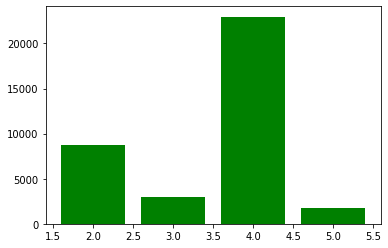

In [62]:
pre.get_rate_counts()

### Score with rated restaurants: Generate a train test set dropping liked restaurants

In [204]:
def score_content_scored(score_bin, filtered_data, col_to_drop, repeat, K=5, ts_size=0.1):
    
    tot_scores=[]
    for i in range(repeat):     
    
        test = train_test_split(score_bin.set_index(['user_id','restaurant_id']), test_size=ts_size)[1]
        test_idx = test.index
    
        idx_to_drop = filtered_data[filtered_data.is_positive==True].reset_index().set_index(['user_id',\
                                                    'restaurant_id']).loc[test_idx,:].set_index('index').index
    
        train_filtered = filtered_data.drop(index=idx_to_drop)
        pre = PreProcessing_Data(data_full, restaurants_df, Rules)
        pre.simple_data = train_filtered
    
        pre.fit_data_score()
        pre.fit_User_Items_Matrix(5,5)
    
        rec = Content_Based_Recc(data_full,  pre.User_Items.fillna(0), restaurants_Datos_Init_01_05_2021, \
                      restaurants__food_types_Datos_Init_01_05_2021, restaurants__vibes_Datos_Init_01_05_2021,\
                      foodtypes_Datos_Init_01_05_2021, vibes_Datos_Init_01_05_2021, \
                      neighborhoods_Datos_Init_01_05_2021)
    
        rec.fit_Items_Content_df()
        rec.fit_User_Content_df()

        tot_scores. append(mean_prec_recall_at_k_content(pre.User_Items.fillna(0), test.reset_index(),\
                           rec.predict_K_ranked, rec.dict_id_off2unoff, K, col_to_drop, binary=False))
        
            
    mean_scores = [sum(y) / len(y) for y in zip(*tot_scores)]
    sigma_acc = np.sqrt(sum([(i[0]-mean_scores[0])**2 for i in tot_scores])/5)
    
    return mean_scores, sigma_acc 
    
    

In [ ]:
scored_score_no_type = score_content_scored(score_bin, filtered_data, col_to_drop=list(type_cols), repeat=5, K=5, ts_size=0.1)


In [207]:
scored_score_no_type

([0.08443020408151977,
  0.0679602621277394,
  0.13934001337097465,
  0.6820340050403688],
 0.003215395132785313)

## Comparing all the content models

In [72]:
scored_df = pd.read_csv('../TFM_Granatiero_Data/content_df_acc.csv', index_col=0)
scored_df

,mean_content_accuracy,mean_content_sd
Full_Feat,0.059553,0.005541
No_Price,0.061452,0.003610
No_Vibe,0.041507,0.002458
No_Stars,0.057428,0.002781
No_Neigh,0.056196,0.002728
No_Type,0.074553,0.003756
Rated_No_Type,0.084430,0.003215


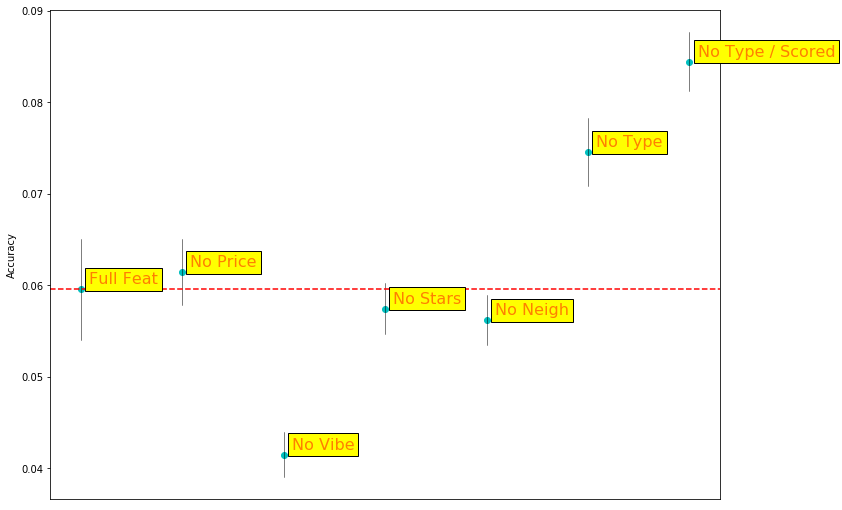

In [233]:
means_w = [score_full[0][0], scores_no_price[0][0], scores_no_vibe[0][0], scores_no_stars[0][0],\
        scores_no_n[0][0], scores_no_type[0][0], scored_score_no_type[0][0]]
weeks = [0 ,5 ,10 ,15 ,20, 25, 30]

plt.figure(figsize=(12,9))
plt.plot(weeks, means_w, 'o', color='c')
plt.text(x=weeks[0]+0.4, y=means_w[0]+.0006, s='Full Feat',\
        fontdict=dict(color='red', alpha=0.5, size=16), bbox=dict(facecolor='yellow',alpha=1))
plt.text(x=weeks[1]+0.4, y=means_w[1]+.0006, s='No Price',\
        fontdict=dict(color='red', alpha=0.5, size=16), bbox=dict(facecolor='yellow',alpha=1))
plt.text(x=weeks[2]+0.4, y=means_w[2]+.0006, s='No Vibe',\
        fontdict=dict(color='red', alpha=0.5, size=16), bbox=dict(facecolor='yellow',alpha=1))
plt.text(x=weeks[3]+0.4, y=means_w[3]+.0006, s='No Stars',\
        fontdict=dict(color='red', alpha=0.5, size=16), bbox=dict(facecolor='yellow',alpha=1))
plt.text(x=weeks[4]+0.4, y=means_w[4]+.0006, s='No Neigh',\
        fontdict=dict(color='red', alpha=0.5, size=16), bbox=dict(facecolor='yellow',alpha=1))
plt.text(x=weeks[5]+0.4, y=means_w[5]+.0006, s='No Type',\
        fontdict=dict(color='red', alpha=0.5, size=16), bbox=dict(facecolor='yellow',alpha=1))
plt.text(x=weeks[6]+0.4, y=means_w[6]+.0006, s='No Type / Scored',\
        fontdict=dict(color='red', alpha=0.5, size=16), bbox=dict(facecolor='yellow',alpha=1))
plt.plot([0,0], [means_w[0]-score_full[1], means_w[0]+score_full[1]], 'k-', lw=.5)
plt.plot([5,5], [means_w[1]-scores_no_price[1], means_w[1]+scores_no_price[1]], 'k-', lw=.5)
plt.plot([10,10], [means_w[2]-scores_no_vibe[1], means_w[2]+scores_no_vibe[1]], 'k-', lw=.5)
plt.plot([15,15], [means_w[3]-scores_no_stars[1], means_w[3]+scores_no_stars[1]], 'k-', lw=.5)
plt.plot([20,20], [means_w[4]-scores_no_n[1], means_w[4]+scores_no_n[1]], 'k-', lw=.5)
plt.plot([25,25], [means_w[5]-scores_no_type[1], means_w[5]+scores_no_type[1]], 'k-', lw=.5)
plt.plot([30,30], [means_w[6]-scored_score_no_type[1], means_w[6]+scored_score_no_type[1]], 'k-', lw=.5)


plt.axhline(y=means_w[0], color='r', linestyle='--')

plt.ylabel('Accuracy')
plt.xticks([])

#plt.savefig('TFM_figures/Acc_no_feats_content.jpg', dpi=300, bbox_inches="tight")